你可以從
[Bookshop.org](https://bookshop.org/a/98697/9781098155438) 和
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325)
訂購《Think Python 3e》的實體書和電子書版本。

In [1]:
from os.path import basename, exists

In [2]:
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("已下載 " + str(local)) # 譯註：這裡顯示下載完成的檔案路徑
    return filename

In [3]:
download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');
download('https://github.com/ramalho/jupyturtle/releases/download/2024-03/jupyturtle.py');

In [4]:
import thinkpython

# 條件判斷與遞迴

這一章的主要內容是 `if` 陳述句，它會根據程式的狀態來執行不同的程式碼。
透過 `if` 陳述句，我們將能探索運算中最强大的概念之一：**遞迴** (recursion)。

但我們會先從三個新功能開始：模數運算子、布林運算式和邏輯運算子。

## 整數除法與模數

回想一下，整數除法運算子 `//` 會將兩個數字相除並向下取整到整數。
例如，假設一部電影的播放時間是 105 分鐘。
你可能會想知道那是幾個小時。
傳統的除法會回傳一個浮點數：

In [5]:
minutes = 105
minutes / 60

1.75

但我們通常不會用小數點來表示小時。
整數除法會回傳小時的整數部分，並向下取整：

In [6]:
minutes = 105
hours = minutes // 60
hours

1

要得到餘數，你可以減去以分鐘為單位的一小時：

In [7]:
remainder = minutes - hours * 60
remainder

45

或者你可以使用 **模數運算子** (modulus operator) `%`，它會將兩個數字相除並回傳餘數。

In [8]:
remainder = minutes % 60
remainder

45

模數運算子比看起來更有用。
例如，它可以檢查一個數字是否能被另一個數字整除——如果 `x % y` 是零，那麼 `x` 就可以被 `y` 整除。

此外，它可以從一個數字中提取最右邊的數字或數字們。
例如，`x % 10` 會得到 `x` 的最右邊一位數字（以十進位來說）。
同樣地，`x % 100` 會得到最後兩位數字。

譯註：Jupyter Notebook 中的 In[X] 編號可能與原文不同，不影響程式碼

In [9]:
x = 123
x % 10

3

譯註：Jupyter Notebook 中的 In[X] 編號可能與原文不同，不影響程式碼

In [10]:
x % 100

23

最後，模數運算子可以做「時鐘算術」。
例如，如果一個活動從早上 11 點開始，持續三個小時，我們可以用模數運算子來算出它什麼時候結束。

譯註：Jupyter Notebook 中的 In[X] 編號可能與原文不同，不影響程式碼

In [12]:
start = 11
duration = 33
end = (start + duration) % 12 # 譯註：12 小時制，所以對 12 取餘數
end

8

這個活動會在下午 2 點結束。

## 布林運算式 (Boolean Expressions)

**布林運算式** (boolean expression) 是一種結果不是 `True` (真) 就是 `False` (假) 的運算式。
例如，下面的運算式使用等號運算子 `==`，它比較兩個值，如果它們相等就產生 `True`，否則產生 `False`：

In [13]:
5 == 5

True

In [14]:
5 == 7

False

一個常見的錯誤是使用單一個等號 (`=`) 而不是雙等號 (`==`)。
記住，`=` 是將值賦予給變數，而 `==` 是比較兩個值。

In [15]:
x = 5
y = 7

In [16]:
x == y

False

`True` 和 `False` 是屬於 `bool` 型別的特殊值；
它們不是字串：

In [17]:
type(True)

bool

In [18]:
type(False)

bool

`==` 運算子是 **關係運算子** (relational operators) 之一；其他的還有：

In [19]:
x != y               # x 不等於 y

True

In [20]:
x > y                # x 大於 y

False

In [21]:
x < y               # x 小於 y

True

In [22]:
x >= y               # x 大於或等於 y

False

In [23]:
x <= y               # x 小於或等於 y

True

## 邏輯運算子 (Logical operators)

為了將布林值組合成運算式，我們可以使用 **邏輯運算子** (logical operators)。
最常見的是 `and`、`or` 和 `not`。
這些運算子的意義和它們在英文中的意義相似。
例如，下面這個運算式的值只有在 `x` 大於 `0` *且* 小於 `10` 時才會是 `True`。

In [24]:
print(x)

5


In [25]:
x > 0 and x < 10

True

下面這個運算式在 *任一條件或兩個條件都* 成立時為 `True`，也就是說，如果數字可以被 2 *或* 3 整除：

In [26]:
x % 2 == 0 or x % 3 == 0

False

最後，`not` 運算子會否定一個布林運算式，所以如果 `x > y` 是 `False`，下面這個運算式就是 `True`。

In [27]:
not x > y

True

嚴格來說，邏輯運算子的運算元應該是布林運算式，但 Python 並不是很嚴格。
任何非零的數字都會被解釋為 `True`：

In [28]:
42 and True

True

這種彈性可能很有用，但它有一些細微之處可能會讓人困惑。
你可能想要避免這樣使用。

## if 陳述句

為了寫出有用的程式，我們幾乎總是需要有能力
檢查條件並相應地改變程式的行為。
**條件陳述句** (Conditional statements) 賦予我們這種能力。最簡單的形式是
`if` 陳述句：

In [29]:
if x > 0:
    print('x 是正數') # 譯註：將英文改為中文

x 是正數


`if` 是 Python 的一個關鍵字。
`if` 陳述句和函式定義有相同的結構：一個
標頭後面跟著一個縮排的陳述句或陳述句序列，稱為一個 **區塊** (block)。

`if` 後面的布林運算式稱為 **條件** (condition)。
如果條件為真，縮排區塊中的陳述句就會執行。如果不是，它們就不會執行。

區塊中可以出現的陳述句數量沒有限制，但至少要有一個。
有時候，有一個什麼都不做的區塊會很有用——通常是作為你還沒寫好的程式碼的佔位符。
在那種情況下，你可以使用 `pass` 陳述句，它什麼也不做。

In [30]:
if x < 0:
    pass          # TODO: 需要處理負數的情況！

註解中的 `TODO` 這個詞是一個慣例，提醒你之後還有事情要做。

## `else` 子句

`if` 陳述句可以有第二個部分，稱為 `else` 子句。
語法看起來像這樣：

In [31]:
if x % 2 == 0:
    print('x 是偶數') # 譯註：將英文改為中文
else:
    print('x 是奇數')

x 是奇數


如果條件為真，第一個縮排的陳述句會執行；否則，第二個縮排的陳述句會執行。

在這個例子中，如果 `x` 是偶數，`x` 除以 `2` 的餘數是 `0`，所以條件為真，程式會顯示 `x 是偶數`。
如果 `x` 是奇數，餘數是 `1`，所以條件
為假，程式會顯示 `x 是奇數`。

由於條件必須為真或假，所以兩個分支中一定會有一個執行。
這些分支稱為 **分支** (branches)。

## 連鎖條件判斷 (Chained conditionals)

有時候會有超過兩種可能性，我們需要超過兩個分支。
表達這種計算的一種方法是 **連鎖條件判斷** (chained conditional)，它包含一個 `elif` 子句。

In [ ]:
if x < y:
    print('x 小於 y') # 譯註：將英文改為中文
elif x > y:
    print('x 大於 y')
else:
    print('x 和 y 相等')

`elif` 是 "else if" 的縮寫。
`elif` 子句的數量沒有限制。
如果有 `else` 子句，它必須在最後面，但並非一定要有
`else` 子句。

每個條件會依序檢查。
如果第一個是假的，就檢查下一個，依此类推。
如果其中一個是真的，相應的分支就會執行，然後 `if` 陳述句結束。
即使有多個條件為真，也只有第一個為真的分支會執行。

## 巢狀條件判斷 (Nested Conditionals)

一個條件判斷也可以嵌套在另一個條件判斷中。
我們可以像這樣寫上一節的例子：

In [ ]:
if x == y:
    print('x 和 y 相等') # 譯註：將英文改為中文
else:
    if x < y:
        print('x 小於 y')
    else:
        print('x 大於 y')

外層的 `if` 陳述句包含兩個分支。
第一個分支包含一個簡單的陳述句。第二個分支包含另一個 `if` 陳述句，它本身有兩個分支。
這兩個分支都是簡單的陳述句，儘管它們也可以是條件陳述句。

雖然陳述句的縮排使得結構很明顯，但 **巢狀條件判斷** (nested conditionals) 可能難以閱讀。
我建議你盡可能避免使用它們。

邏輯運算子通常提供一種簡化巢狀條件陳述句的方法。
這裡有一個帶有巢狀條件判斷的例子。

In [32]:
if 0 < x:
    if x < 10:
        print('x 是一個正的個位數。') # 譯註：將英文改為中文

x 是一個正的個位數。


只有當我們通過了兩個條件判斷，`print` 陳述句才會執行，所以我們用 `and` 運算子可以得到相同的效果。

In [34]:
if 0 < x and x < 10:
    print('x 是一個正的個位數。') # 譯註：將英文改為中文

x 是一個正的個位數。


對於這種條件，Python 提供了一個更簡潔的選項：

In [33]:
if 0 < x < 10: # 譯註：Python 允許這種鏈式比較
    print('x 是一個正的個位數。')

x 是一個正的個位數。


## 遞迴 (Recursion)

函式呼叫自己是合法的。
這為什麼是件好事可能不是很明顯，但事實證明這是程式可以做的最神奇的事情之一。
這裡有一個例子。

In [ ]:
def countdown(n):
    if n <= 0:
        print('發射！') # 譯註：將英文改為中文
    else:
        print(n)
        countdown(n-1) # 譯註：函式呼叫自己


如果 `n` 是 0 或負數，`countdown` 會輸出 "發射！"。否則，它會
輸出 `n`，然後呼叫自己，並傳入 `n-1` 作為引數。

當我們用引數 `3` 呼叫這個函式時，會發生以下情況。

In [38]:
countdown(5)

5
4
3
2
1
發射！


`countdown` 的執行從 `n=3` 開始，由於 `n` 大於
`0`，它顯示 `3`，然後呼叫自己…

> `countdown` 的執行從 `n=2` 開始，由於 `n` 大於
> `0`，它顯示 `2`，然後呼叫自己…
>
> > `countdown` 的執行從 `n=1` 開始，由於 `n` 大於
> > `0`，它顯示 `1`，然後呼叫自己…
> >
> > > `countdown` 的執行從 `n=0` 開始，由於 `n`
> > > 不大於 `0`，它顯示 "發射！" 並返回。
> >
> > 得到 `n=1` 的 `countdown` 返回。
>
> 得到 `n=2` 的 `countdown` 返回。

得到 `n=3` 的 `countdown` 返回。

呼叫自己的函式稱為 **遞迴的** (recursive)。
作為另一個例子，我們可以寫一個函式，將一個字串印出 `n` 次。

In [40]:
def print_n_times(string, n):
    if n > 0:
        print(string)
        print_n_times(string, n-1)

如果 `n` 是正數，`print_n_times` 會顯示 `string` 的值，然後呼叫自己，並傳入 `string` 和 `n-1` 作為引數。

如果 `n` 是 `0` 或負數，條件為假，`print_n_times` 什麼也不做。

它是這樣運作的。

In [41]:
print_n_times('午餐肉 ', 4) # 譯註：將英文改為中文

午餐肉 
午餐肉 
午餐肉 
午餐肉 


對於像這樣的簡單例子，使用 `for`
迴圈可能更容易。但我們稍後會看到一些很難用 `for`
迴圈編寫，但用遞迴卻很容易編寫的例子，所以早點開始是好的。

## 遞迴函式的堆疊圖

這裡有一個堆疊圖，顯示了當我們用 `n = 3` 呼叫 `countdown` 時創建的框架。

In [42]:
from diagram import make_frame, Stack # 譯註：這是書中用來畫圖的工具

In [43]:
frames = []
for n_val in [3,2,1,0]: # 譯註：變數名改為 n_val 避免與外層 n 衝突 (雖然此處無外層 n)
    d = dict(n=n_val)
    frame = make_frame(d, name='countdown', dy=-0.3, loc='left')
    frames.append(frame)

In [44]:
stack = Stack(frames, dy=-0.5)

In [45]:
from diagram import diagram, adjust # 譯註：這是書中用來畫圖的工具

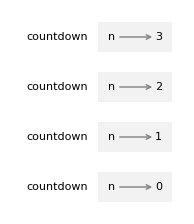

In [46]:
width, height, x_pos, y_pos = [1.74, 2.04, 1.05, 1.77] # 譯註：變數名 x, y 改為 x_pos, y_pos
ax = diagram(width, height)
bbox = stack.draw(ax, x_pos, y_pos)
# adjust(x_pos, y_pos, bbox) # 譯註：調整圖表位置的函式，這裡被註解掉了

四個 `countdown` 框架的參數 `n` 的值不同。
堆疊的底部，`n=0` 的地方，稱為 **基礎案例** (base case) 或 **基本情況**。
它不會進行遞迴呼叫，所以不會再有更多的框架。

In [ ]:
from diagram import make_frame, Stack # 譯註：這是書中用來畫圖的工具
from diagram import diagram, adjust

In [47]:
frames = []
for n_val in [2,1,0]: # 譯註：變數名改為 n_val
    d = dict(string='哈囉', n=n_val) # 譯註：將英文改為中文
    frame = make_frame(d, name='print_n_times', dx=1.3, loc='left')
    frames.append(frame)

In [48]:
stack = Stack(frames, dy=-0.5)

d:\project\ThinkPythonSolutions\soln_translated_ipynb\diagram.py:84: UserWarning: Glyph 21704 (\N{CJK UNIFIED IDEOGRAPH-54C8}) missing from font(s) DejaVu Sans.
  bbox = handle.get_window_extent()
d:\project\ThinkPythonSolutions\soln_translated_ipynb\diagram.py:84: UserWarning: Glyph 22217 (\N{CJK UNIFIED IDEOGRAPH-56C9}) missing from font(s) DejaVu Sans.
  bbox = handle.get_window_extent()
d:\project\ThinkPythonSolutions\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 21704 (\N{CJK UNIFIED IDEOGRAPH-54C8}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\project\ThinkPythonSolutions\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 22217 (\N{CJK UNIFIED IDEOGRAPH-56C9}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\project\ThinkPythonSolutions\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21704 (\N{CJK UNIFIED IDEOGRAPH-54C8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(by

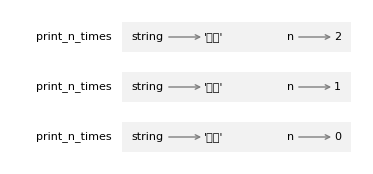

In [49]:
width, height, x_pos, y_pos = [3.53, 1.54, 1.54, 1.27] # 譯註：變數名 x, y 改為 x_pos, y_pos
ax = diagram(width, height)
bbox = stack.draw(ax, x_pos, y_pos)
# adjust(x_pos, y_pos, bbox)

## 無窮遞迴 (Infinite recursion)

如果一個遞迴永遠達不到基礎案例，它就會一直進行遞迴
呼叫，程式永遠不會終止。這被稱為
**無窮遞迴** (infinite recursion)，通常不是一件好事。
這裡有一個帶有無窮遞迴的最小函式。

In [ ]:
def recurse():
    recurse() # 譯註：函式呼叫自己，沒有結束條件

每次 `recurse` 被呼叫時，它都會呼叫自己，這會創建另一個框架。
在 Python 中，堆疊上同時可以存在的框架數量是有限制的。
如果程式超過了這個限制，就會導致執行期錯誤。

In [ ]:
get_ipython().run_line_magic('xmode', 'Context') # 譯註：設定錯誤回報模式為 Context (上下文)

In [ ]:
get_ipython().run_cell_magic('expect', 'RecursionError', '\nrecurse()\n') # 譯註：預期 RecursionError (遞迴錯誤)

回溯追蹤顯示，錯誤發生時堆疊上大約有 3000 個框架。

如果你不小心遇到了無窮遞迴，檢查你的函式以確認
有一個不會進行遞迴呼叫的基礎案例。如果有基礎案例，
檢查你是否保證能達到它。

## 鍵盤輸入 (Keyboard input)

到目前為止，我們寫的程式不接受使用者的任何輸入。它們
每次都做同樣的事情。

Python 提供了一個名為 `input` 的內建函式，它會停止
程式並等待使用者輸入一些東西。當使用者按下
*Return* 或 *Enter* 鍵時，程式會繼續執行，而 `input` 會將使用者
輸入的內容作為字串回傳。

解答 (譯註：原文此處為 Solution，是為了讓 Notebook 能自動執行而替換 input 函式)

In [50]:
# 這個儲存格替換了 input 函式，這樣筆記本就可以在不暫停的情況下執行
def input_mock(): # 譯註：為了不覆蓋內建 input，這裡改名為 input_mock
     return

text = input() # 譯註：如果實際執行，會等待使用者輸入

在從使用者那裡獲取輸入之前，你可能想顯示一個提示
告訴使用者要輸入什麼。`input` 可以接受一個提示作為引數：

解答 (譯註：原文此處為 Solution)

In [51]:
# 這個儲存格替換了 input 函式，這樣筆記本就可以在不暫停的情況下執行
def input_mock_prompt(prompt): # 譯註：改名為 input_mock_prompt
    print(prompt, end='')
    reply = '我是亞瑟，不列顛之王' # 譯註：將英文改為中文
    print(reply)
    return reply

name = input_mock_prompt('你...叫什麼名字？\n') # 譯註：使用模擬的 input，並將英文改為中文
name

提示結尾的序列 `\n` 代表一個 **換行符** (newline)，它是一個特殊字元，會導致換行——這樣使用者的輸入就會出現在提示下方。

如果你期望使用者輸入一個整數，你可以使用 `int` 函式將回傳值轉換為 `int`。

解答 (譯註：原文此處為 Solution)

In [52]:
# 這個儲存格替換了 input 函式，這樣筆記本就可以在不暫停的情況下執行
def input_mock_airspeed(prompt): # 譯註：改名為 input_mock_airspeed
    print(prompt, end='')
    reply = '你說的是：非洲還是歐洲的燕子？' # 譯註：將英文改為中文
    print(reply)
    return reply

prompt = '請問...一隻未負重的燕子的空速是多少？\n' # 譯註：將英文改為中文
speed = input_mock_airspeed(prompt)
speed

但是如果他們輸入了不是整數的東西，你會得到一個執行期錯誤。

In [ ]:
get_ipython().run_line_magic('xmode', 'Minimal') # 譯註：設定錯誤回報模式為 Minimal (最簡)

speed_value = "這不是數字" # 譯註：假設使用者輸入非數字
get_ipython().run_cell_magic('expect', 'ValueError', '\nint(speed_value)\n') # 譯註：預期 ValueError

我們稍後會看到如何處理這種錯誤。

## 除錯 (Debugging)

當語法或執行期錯誤發生時，錯誤訊息包含很多
資訊，但可能會讓人不知所措。最有用的部分
通常是：

-   它是什麼類型的錯誤，以及

-   它發生在哪裡。

語法錯誤通常很容易找到，但有一些陷阱。
與空格和定位字元相關的錯誤可能很棘手，因為它們是不可見的
而且我們習慣忽略它們。

get_ipython().run_cell_magic('expect', 'IndentationError', 'x_val = 5\n y_val = 6\n')
譯註：原文的 'x = 5\n y = 6\n' 會產生 IndentationError，因為第二行多了一個空格。
為了避免與其他 x, y 變數混淆，這裡改名為 x_val, y_val。
實際執行時，如果 y_val 前面多一個空格，就會報錯。

在這個例子中，問題是第二行縮排了一個空格。
但是錯誤訊息指向 `y`，這具有誤導性。
錯誤訊息指出問題被發現的地方，但實際的錯誤可能在程式碼的更早部分。

執行期錯誤也是如此。
例如，假設你試圖將一個比率轉換為分貝，像這樣：

In [ ]:
get_ipython().run_line_magic('xmode', 'Context') # 譯註：設定錯誤回報模式為 Context

import math
numerator = 9
denominator = 10
ratio = numerator // denominator # 譯註：這裡因為整數除法，ratio 會變成 0
get_ipython().run_cell_magic('expect', 'ValueError', 'decibels = 10 * math.log10(ratio)\n') # 譯註：log10(0) 會導致 ValueError

錯誤訊息指示第 5 行（`decibels = ...`），但那一行並沒有問題。
問題在第 4 行（`ratio = ...`），它使用了整數除法而不是浮點數除法——結果，`ratio` 的值是 `0`。
當我們呼叫 `math.log10` 時，我們會得到一個 `ValueError`，訊息是 `math domain error`（數學定義域錯誤），因為 `0` 不在 `math.log10` 的有效引數「定義域」內，因為 `0` 的對數是未定義的。

一般來說，你應該花時間仔細閱讀錯誤訊息，但不要假設它們說的一切都是正確的。

## 詞彙表

**遞迴 (recursion):**
呼叫目前正在執行的函式的過程。

**模數運算子 (modulus operator):**
一個運算子 `%`，作用於整數並回傳一個數字除以另一個數字的餘數。

**布林運算式 (boolean expression):**
其值為 `True` 或 `False` 的運算式。

**關係運算子 (relational operator):**
比較其運算元的運算子之一：`==`、`!=`、`>`、`<`、`>=` 和 `<=`。

**邏輯運算子 (logical operator):**
組合布林運算式的運算子之一，包括 `and`、`or` 和 `not`。

**條件陳述句 (conditional statement):**
根據某些條件控制執行流程的陳述句。

**條件 (condition):**
條件陳述句中決定哪個分支執行的布林運算式。

**區塊 (block):**
一個或多個縮排的陳述句，表示它們是另一個陳述句的一部分。

**分支 (branch):**
條件陳述句中可供選擇的陳述句序列之一。

**連鎖條件判斷 (chained conditional):**
具有一系列替代分支的條件陳述句。

**巢狀條件判斷 (nested conditional):**
出現在另一個條件陳述句的某個分支中的條件陳述句。

**遞迴的 (recursive):**
呼叫自己的函式是遞迴的。

**基礎案例 (base case) / 基本情況:**
遞迴函式中不進行遞迴呼叫的條件分支。

**無窮遞迴 (infinite recursion):**
沒有基礎案例，或永遠達不到基礎案例的遞迴。
最終，無窮遞迴會導致執行期錯誤。

**換行符 (newline):**
在字串的兩個部分之間建立換行的字元。

## 練習

這個儲存格告訴 Jupyter 在發生執行期錯誤時提供詳細的除錯資訊。
在做練習之前先執行它。

In [ ]:
get_ipython().run_line_magic('xmode', 'Verbose')

### 問問虛擬助理

*   問虛擬助理：「模數運算子有哪些用途？」

*   Python 提供了計算邏輯運算 `and`、`or` 和 `not` 的運算子，但它沒有計算互斥或 (exclusive `or`) 運算的運算子，通常寫作 `xor`。問助理：「什麼是邏輯 xor 運算，以及如何在 Python 中計算它？」

在本章中，我們看到了兩種編寫具有三個分支的 `if` 陳述句的方法，使用連鎖條件判斷或巢狀條件判斷。
你可以使用虛擬助理在兩者之間進行轉換。
例如，問虛擬助理：「將此陳述句轉換為連鎖條件判斷。」

In [53]:
x = 5 # 譯註：為方便後續執行，這裡重新賦值
y = 7

In [54]:
if x == y:
    print('x 和 y 相等') # 譯註：將英文改為中文
else:
    if x < y:
        print('x 小於 y')
    else:
        print('x 大於 y')

x 小於 y


問虛擬助理：「用單一條件判斷重寫此陳述句。」

In [55]:
if 0 < x:
    if x < 10:
        print('x 是一個正的個位數。') # 譯註：將英文改為中文

x 是一個正的個位數。


看看虛擬助理是否能簡化這個不必要的複雜寫法。

In [ ]:
if not x <= 0 and not x >= 10:
    print('x 是一個正的個位數。') # 譯註：將英文改為中文

這是一個嘗試遞迴倒數兩個數字的函式。

In [56]:
def countdown_by_two(n):
    if n == 0:
        print('發射！') # 譯註：將英文改為中文
    else:
        print(n)
        countdown_by_two(n-2)

看起來運作正常。

In [57]:
countdown_by_two(6)

6
4
2
發射！


但它有一個錯誤。問虛擬助理哪裡錯了以及如何修正。
將它提供的解決方案貼回到這裡並進行測試。
(譯註：提示，如果 n 是奇數會發生什麼事？)

### 練習

`time` 模組提供了一個也叫做 `time` 的函式，它回傳
自「Unix 紀元」(Unix epoch) 以來的秒數，也就是 1970 年 1 月 1 日 00:00:00 UTC (協調世界時)。

In [58]:
from time import time

In [71]:
now = time()
now

1750674423.0452828

使用整數除法和模數運算子計算自 1970 年 1 月 1 日以來的天數，以及目前時間的小時、分鐘和秒。

你可以在 <https://docs.python.org/3/library/time.html> 閱讀更多關於 `time` 模組的資訊。

解答

In [72]:
seconds_per_day = 24 * 60 * 60
days = now // seconds_per_day
days

20262.0

解答

In [77]:
seconds_per_day = 24 * 60 * 60
seconds_per_day

86400

In [83]:
remainder_after_days = now % seconds_per_day # 譯註：變數名修改，更清晰
remainder_after_days

37623.04528284073

In [ ]:
hours = remainder_after_days // 3600
hours

10.0

解答

In [85]:
remainder_after_hours = remainder_after_days % 3600 # 譯註：變數名修改

In [86]:
minutes = remainder_after_hours // 60
minutes

27.0

解答

In [87]:
seconds = remainder_after_hours % 60
seconds

3.0452828407287598

### 練習

如果給你三根棍子，你可能可以或不一定可以把它們
排列成一個三角形。例如，如果其中一根棍子長 12 英寸，
另外兩根各長一英寸，你就無法讓
短棍子在中間相遇。對於任何三個長度，都有一個
測試方法來判斷是否可能形成三角形：

> 如果三個長度中的任何一個大於其他兩個長度的總和，
> 那麼你就無法形成三角形。否則，你可以。（如果
> 兩個長度的總和等於第三個長度，它們會形成所謂的「退化」
> 三角形。）

寫一個名為 `is_triangle` 的函式，它接受三個整數作為
引數，並根據你是否可以
用給定長度的棍子形成三角形，印出 "可以" 或 "不可以"。
提示：使用連鎖條件判斷。


解答

In [88]:
def is_triangle(a, b, c):
    if a > b + c:
        print('不可以') # 譯註：將英文改為中文
    elif b > a + c:
        print('不可以')
    elif c > a + b:
        print('不可以')
    else:
        print('可以')

用以下案例測試你的函式。

In [89]:
is_triangle(4, 5, 6)   # 應該是 可以

可以


In [90]:
is_triangle(1, 2, 3)   # 應該是 可以 (退化三角形)

可以


In [91]:
is_triangle(6, 2, 3)   # 應該是 不可以

不可以


In [92]:
is_triangle(1, 1, 12)  # 應該是 不可以

不可以


### 練習

下列程式的輸出是什麼？畫一個堆疊圖，
顯示程式印出結果時的狀態。

In [93]:
def recurse_sum(n_val, s_val): # 譯註：變數名修改以避免與其他n,s衝突
    if n_val == 0:
        print(s_val)
    else:
        recurse_sum(n_val-1, n_val+s_val)

In [94]:
recurse_sum(3, 0)

6


解答

In [ ]:
"""計算从 1 到 `n_val` 的數字總和

n_val: 整數
s_val: 到目前為止數字的總和
"""
# 譯註：當 recurse_sum(3, 0) 被呼叫時：
# recurse_sum(3, 0) -> recurse_sum(2, 3+0=3)
# recurse_sum(2, 3) -> recurse_sum(1, 2+3=5)
# recurse_sum(1, 5) -> recurse_sum(0, 1+5=6)
# recurse_sum(0, 6) -> print(6)
# 所以輸出是 6

解答 (堆疊圖的程式碼)

In [ ]:
from diagram import make_frame, Stack # 譯註：這是書中用來畫圖的工具
from diagram import diagram, adjust

In [ ]:
frames = []
# 譯註：原始的 s 計算 (6-sum(range(n+1))) 是為了讓最後 s 為 6。
# 這裡我們模擬實際呼叫時 s 的變化
s_values_in_call = [0, 3, 5, 6] # s 在每次呼叫 recurse_sum 時的值 (對應 n = 3, 2, 1, 0)
n_values_in_call = [3, 2, 1, 0]

In [ ]:
for i in range(len(n_values_in_call)):
    n_current = n_values_in_call[i]
    s_current = s_values_in_call[i]
    d = dict(n_val=n_current, s_val=s_current)
    frame = make_frame(d, name='recurse_sum', dx=1.0, loc='left')
    frames.append(frame)

In [ ]:
# 堆疊圖的順序是從最先呼叫到最後呼叫 (底部到頂部)，或者反過來。
# 這裡的 frames 順序是呼叫順序，Stack 會將其畫成堆疊。
stack = Stack(frames, dy=-0.5)

In [ ]:
width, height, x_pos, y_pos = [2.49, 2.04, 0.81, 1.77] # 譯註：變數名 x, y 改為 x_pos, y_pos
ax = diagram(width, height)
bbox = stack.draw(ax, x_pos, y_pos)
# adjust(x_pos, y_pos, bbox)

### 練習

下面的練習使用第 4 章描述的 `jupyturtle` 模組。

閱讀下面的函式，看看你是否能弄清楚它做了什麼。
然後執行它，看看你是否猜對了。
調整 `length`、`angle` 和 `factor` 的值，看看它們對結果有什麼影響。
如果你不確定它是如何運作的，可以試著問虛擬助理。

In [95]:
from jupyturtle import forward, left, right, back, make_turtle # 譯註：補上 make_turtle

In [124]:
def draw_fractal_tree(length_val): # 譯註：函式名和參數名修改
    angle_val = 40 # 譯註：變數名修改
    factor_val = 0.6 # 譯註：變數名修改

    if length_val > 5:
        forward(length_val)
        left(angle_val)
        draw_fractal_tree(factor_val * length_val) # 遞迴呼叫
        right(2 * angle_val)
        draw_fractal_tree(factor_val * length_val) # 遞迴呼叫  
        left(angle_val)

        right(3 * angle_val)
        draw_fractal_tree(factor_val * length_val) # 遞迴呼叫
        left( angle_val)
        back(length_val)

解答

from jupyturtle import make_turtle # 譯註：已在上方 import

In [125]:
make_turtle(delay=0)
draw_fractal_tree(60) # 譯註：呼叫修改後的函式名

### 練習

問虛擬助理：「什麼是科赫曲線 (Koch curve)？」

要畫一條長度為 `x` 的科赫曲線，你只需要
做：

1.  畫一條長度為 `x/3` 的科赫曲線。

2.  向左轉 60 度。

3.  畫一條長度為 `x/3` 的科赫曲線。

4.  向右轉 120 度。

5.  畫一條長度為 `x/3` 的科赫曲線。

6.  向左轉 60 度。

7.  畫一條長度為 `x/3` 的科赫曲線。

例外情況是如果 `x` 小於 `5`——在這種情況下，你只需要畫一條長度為 `x` 的直線。

寫一個名為 `koch` 的函式，它接受 `x` 作為引數，並畫出給定長度的科赫曲線。


解答

In [126]:
def koch(length_val): # 譯註：參數名修改
    """畫一條長度為 length_val 的科赫曲線。"""
    if length_val < 5:
        forward(length_val)
    else:
        koch(length_val / 3)
        left(60)
        koch(length_val / 3)
        right(120)
        koch(length_val / 3)
        left(60)
        koch(length_val / 3)

結果應該像這樣：
(譯註：執行後會出現一個類似雪花邊緣的圖形)

In [128]:
make_turtle(delay=0)
koch(220)

一旦你的 `koch` 函式可以運作，你就可以使用這個迴圈來畫出三個科赫曲線，形成雪花的形狀。

In [129]:
make_turtle(delay=0, height=300)
for i in range(3):
    koch(120)
    right(120)

### 練習

虛擬助理知道 `jupyturtle` 模組中的函式，但是這些函式有很多版本，名稱也不同，所以虛擬助理可能不知道你在說哪一個。

為了解決這個問題，你可以在提問之前提供額外的資訊。
例如，你可以用「這是一個使用 `jupyturtle` 模組的程式：」作為提示的開頭，然後貼上本章中的一個範例。
之後，虛擬助理應該就能夠產生使用這個模組的程式碼了。

作為範例，請虛擬助理提供一個畫謝爾賓斯基三角形 (Sierpiński triangle) 的程式。
你得到的程式碼應該是一個不錯的起點，但你可能需要進行一些除錯。
如果第一次嘗試不成功，你可以告訴虛擬助理發生了什麼事並請求協助——或者你可以自己除錯。

解答

這是作者在 2023 年 6 月從 ChatGPT 得到的程式碼，只有少數修正

In [130]:
def draw_sierpinski(length_val, depth_val): # 譯註：參數名修改
    if depth_val == 0:
        for _ in range(3):
            forward(length_val)
            left(120)
    else:
        # 畫左下角的小三角形
        draw_sierpinski(length_val / 2, depth_val - 1)
        # 移動到右上角小三角形的起點
        forward(length_val / 2)
        # 畫右上角的小三角形
        draw_sierpinski(length_val / 2, depth_val - 1)
        # 移動到頂部小三角形的起點
        back(length_val / 2) # 退回到大三角形的頂點
        left(60)
        forward(length_val / 2)
        right(60)
        # 畫頂部的小三角形
        draw_sierpinski(length_val / 2, depth_val - 1)
        # 回到大三角形的初始方向和位置 (相對而言)
        left(60)
        back(length_val / 2)
        right(60)

結果可能像這樣，儘管你得到的版本可能會不同。
(譯註：執行後會出現一個由許多小三角形組成的大三角形分形圖案)

In [140]:
make_turtle(delay=0, height=200)
draw_sierpinski(90, 3) # 畫一個邊長100，深度3的謝爾賓斯基三角形

[Think Python: 3rd Edition](https://allendowney.github.io/ThinkPython/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com)

程式碼授權: [MIT License](https://mit-license.org/)

文字授權: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)